# Objective:
## To explore data and perform data imputation with acceptable facts and reasoning.

## Importing required libraries and reading datasets into data frames

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cst_newlist = pd.read_excel( 'KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='NewCustomerList', skiprows=range(1) )
print ('NewCustomerList read into a pandas dataframe!')

NewCustomerList read into a pandas dataframe!


## Data Exploration

In [3]:
cst_newlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
first_name                             1000 non-null object
last_name                              971 non-null object
gender                                 1000 non-null object
past_3_years_bike_related_purchases    1000 non-null int64
DOB                                    983 non-null datetime64[ns]
job_title                              894 non-null object
job_industry_category                  835 non-null object
wealth_segment                         1000 non-null object
deceased_indicator                     1000 non-null object
owns_car                               1000 non-null object
tenure                                 1000 non-null int64
address                                1000 non-null object
postcode                               1000 non-null int64
state                                  1000 non-null object
country                                1000 non-null 

In [4]:
cst_newlist.isna().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [5]:
print( "{} duplicate rows detected.".format( cst_newlist.duplicated().sum() ) )

0 duplicate rows detected.


## Data Cleaning:

In [6]:
df = cst_newlist.copy(deep=True)

In [7]:
np.unique(df["deceased_indicator"].astype(str), return_counts=True)

(array(['N'], dtype=object), array([1000], dtype=int64))

In [8]:
df["deceased_indicator"].value_counts()

N    1000
Name: deceased_indicator, dtype: int64

All 1000 customers contain 'N' in the Deceased customer column and will not affect the marketing strategy at all. Hence, we should drop the column "deceased_indicator".

In [9]:
df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


In [10]:
df = df.drop(["deceased_indicator"], axis=1)

There are 4 columns which are unnamed and needs to be dropped.

In [11]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

At initial stage, geographical strategy will only require postal code and state information. Thus, we will drop "address" column.

In [12]:
df = df.drop(["address"], axis=1)
df.head(3)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,Yes,14,4500,QLD,Australia,6,1,1.71875
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,No,16,2113,NSW,Australia,11,1,1.71875
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,No,10,3505,VIC,Australia,5,1,1.71875


## Data Preparation:

### 1. Last Name:

In [13]:
df['last_name'] = df['last_name'].fillna(method='ffill')

### 2. DOB and AGE:

In [14]:
## Counting age of each customer as per today. ##

now = pd.Timestamp('now')
# convert DOB to Timestamps using pd.to_datetime
df['DOB'] = pd.to_datetime(df['DOB'], format='%m%d%y') 

# Format '%m%d%y' converts the last two digits to years, but unfortunately assumes 52 means 2052.
# let's subtract 100 years from DOB whenever the dob is greater than now.
df['DOB'] = df['DOB'].where(df['DOB'] < now, df['DOB'] -  np.timedelta64(100, 'Y'))

# Subtract DOB from now to obtain timedelta64[ns] and convert to years using astype('<m8[Y]') or astype('timedelta64[Y]').
df['age'] = (now - df['DOB']).astype('<m8[Y]')

df[['DOB','age']][:5]

,DOB,age
0,1957-07-12,63.0
1,1970-03-22,50.0
2,1974-08-28,45.0
3,1979-01-28,41.0
4,1965-09-21,54.0


In [15]:
df = df.drop(["DOB"], axis=1)

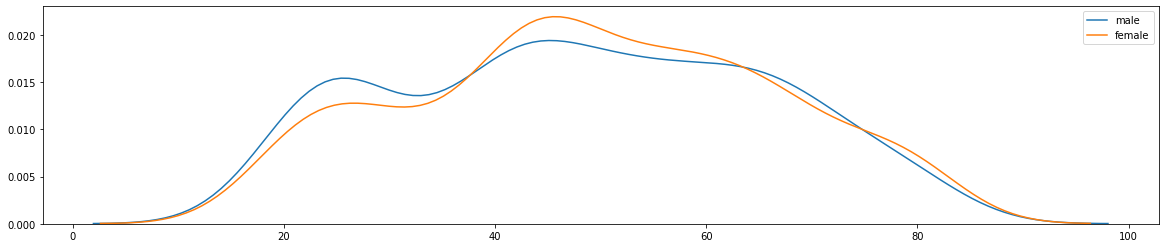

In [16]:
plt.figure(figsize=(20,4))
sns.kdeplot(df[df.gender == 'Male'].age, label='male')
sns.kdeplot(df[df.gender == 'Female'].age, label='female')
plt.legend()

plt.savefig("AgeKde.png", bbox_inches='tight', dpi=300)

In [17]:
df.age.isna().sum()

17

**Point 1:** Looking at the plot above, we can say that there is high probability of these 17 records belonging to the age group 25-35.

In [18]:
df[df.age.isna() == True][['gender', 'age']]

,gender,age
59,U,NaN
226,U,NaN
324,U,NaN
358,U,NaN
360,U,NaN
374,U,NaN
434,U,NaN
439,U,NaN
574,U,NaN
598,U,NaN


We could have imputed age for this 17 records taking mean of the respective gender groups.     
**Point 2:** Unfortunately, people with missing age have their 'gender' recorded as 'U' at the same time. So, we will have to think of something else.

In [19]:
np.unique(df["gender"].astype(str), return_counts=True)

(array(['Female', 'Male', 'U'], dtype=object),
 array([513, 470,  17], dtype=int64))

**Point 3:** We can assign gender=Male for these 17 records to reduce the gender skewness of the dataset.

**Point 4** from **Australian Bureau of Statistics**: Male and female participation rates were similar, except in the 25-34 age group where participation rates were higher for males (67%) than females (61%). Let's check out this particular age group.

**Considering all the 4 points above, we will impute missing ages with the values between 25-35 and gender=Male.**

In [20]:
age_index = list(df[df['age'].isna()].index.values)
age_list = np.random.choice(range(25,40), len(age_index))
for i in range(len(age_index)):
    df.iloc[age_index[i], df.columns.get_loc("age")] = age_list[i]

In [21]:
gen_index = list(df[df['gender'] == 'U'].index.values)
gen_list = np.random.choice(['Male', 'Female'], len(gen_index), p=[0.7, 0.3])
for i in range(len(gen_index)):
    df.iloc[gen_index[i],df.columns.get_loc("gender")] = gen_list[i]

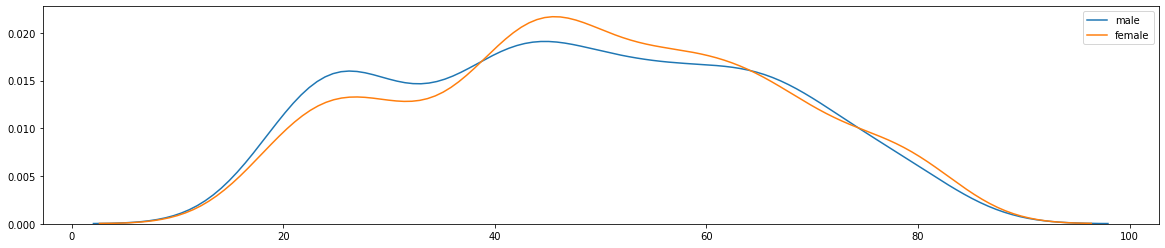

In [22]:
plt.figure(figsize=(20,4))
sns.kdeplot(df[df.gender == 'Male'].age, label='male')
sns.kdeplot(df[df.gender == 'Female'].age, label='female')
plt.legend()

### 2. Job Title and Job Industry Category:

For **Job Industry Category** we will impute the missing value in such a value that **current proportions of categories remains the same.** So that we do not create any bias for a particular industry by using `'ffill'` or `'bfill'`.

In [23]:
np.unique(df["job_industry_category"].astype(str), return_counts=True)

(array(['Argiculture', 'Entertainment', 'Financial Services', 'Health',
        'IT', 'Manufacturing', 'Property', 'Retail', 'Telecommunications',
        'nan'], dtype=object),
 array([ 26,  37, 203, 152,  51, 199,  64,  78,  25, 165], dtype=int64))

In [24]:
ind_names = ['Argiculture', 'Entertainment', 'Financial Services', 'Health', 'IT', 'Manufacturing',
                                  'Property', 'Retail', 'Telecommunications']
ind_counts = [ 26,  37, 203, 152,  51, 199,  64,  78,  25]
ind_sum = sum(ind_counts)
ind_ratio = [x / ind_sum for x in ind_counts]

In [25]:
ind_index = list(df[df['job_industry_category'].isna()].index.values)
ind_list = np.random.choice( ind_names, len(ind_index), p= ind_ratio)
for i in range(len(ind_index)):
    df.iloc[ind_index[i],df.columns.get_loc("job_industry_category")] = ind_list[i]

In [26]:
# For **Job Title** we will impute the missing titles based on the corresponding
# **Gender, wealth_segment, Job industry category, Tenure, Postcode.**

# df_counts = df["job_title"].value_counts().rename_axis('titles').reset_index(name='counts')
# df_counts = df_counts[df_counts['counts'] != 1]
# df_title = df_title[df_title["job_title"].isin(df_counts["titles"].tolist())]

# def do_one_hot(dataframe, column_name):
#     dataframe = pd.concat([dataframe,pd.get_dummies(dataframe[column_name])],axis=1)
#     dataframe.drop([column_name],axis=1, inplace=True)
#     return dataframe

# features = df_title[df_title.columns.difference(['job_title'])]
# labels = df_title[['job_title']]

For **Job_title** we will impute the missing titles using the random titles available in the corresponding **job_industry_category**.

In [27]:
for category in df["job_industry_category"].unique().tolist():
    t_list = df[df["job_industry_category"]==category]['job_title'].unique().tolist()
    t_list = [x for x in t_list if str(x) != 'nan']
    t_index = list(df[(df["job_industry_category"]==category) & df["job_title"].isna()].index.values)
    t_choice = np.random.choice( t_list, len(t_index) )
    for i in range(len(t_index)):
        df.iloc[t_index[i],df.columns.get_loc("job_title")] = t_choice[i]

In [28]:
df.isna().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
owns_car                               0
tenure                                 0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
age                                    0
dtype: int64

**Now our dataset is ready for further analysis.**

In [29]:
# df.to_excel('export_dataframe.xlsx', index = False, header=True)